# My First PyTorch Training

### Import Libraries

Import PyTorch, pandas, NumPy, and scikit-learn. (Or feel free to import them as needed in the cells below.)

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import sklearn
from pathlib import Path

### Import Data

Import the `streeteasy.csv` dataset and preview the first few rows.

In [2]:
if 'kaggle' in str(Path().cwd()):
    path = Path('/kaggle/input')
else:
    path = Path().cwd()

In [3]:
data = pd.read_csv(path/'streeteasy-dataset/manhattan.csv')
data

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,7582,4210,1.0,1,532,3,8.0,16,1,1,1,1,1,1,0,1,Chelsea,Manhattan
3535,5686,6675,2.0,2,988,5,10.0,9,1,1,1,1,1,1,0,1,Tribeca,Manhattan
3536,9679,1699,0.0,1,250,2,5.0,96,0,0,0,0,0,0,0,0,Little Italy,Manhattan
3537,5188,3475,1.0,1,651,6,5.0,14,1,0,1,1,1,1,0,1,Midtown West,Manhattan


### Select Target

Select the numeric column that the neural network will be trying to predict. Feel free to use rent again, or try to predict another column!

Convert this column to a PyTorch tensor.

We are removing few columns which do not effect our predictions.

In [4]:
targetColumns = ['rent']
data[targetColumns].values

array([[ 2550],
       [11500],
       [ 4500],
       ...,
       [ 1699],
       [ 3475],
       [ 4500]])

In [5]:
targetTensor = torch.tensor(data[targetColumns].values, dtype = torch.float)
targetTensor.shape

torch.Size([3539, 1])

### Select Features

Select the numeric columns that the neural network will use as input features to predict the target.

In [6]:
inputColumns = ['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs']
data[inputColumns].values

array([[0.00e+00, 1.00e+00, 4.80e+02, 9.00e+00, 2.00e+00, 1.70e+01],
       [2.00e+00, 2.00e+00, 2.00e+03, 4.00e+00, 1.00e+00, 9.60e+01],
       [1.00e+00, 1.00e+00, 9.16e+02, 2.00e+00, 5.10e+01, 2.90e+01],
       ...,
       [0.00e+00, 1.00e+00, 2.50e+02, 2.00e+00, 5.00e+00, 9.60e+01],
       [1.00e+00, 1.00e+00, 6.51e+02, 6.00e+00, 5.00e+00, 1.40e+01],
       [1.00e+00, 1.00e+00, 8.16e+02, 4.00e+00, 1.10e+01, 9.00e+00]])

In [7]:
inputTensor = torch.tensor(data[inputColumns].values, dtype = torch.float)
inputTensor.shape

torch.Size([3539, 6])

### Train-Test-Split

Split the features and target into training and testing datasets. A good initial proportion is 80/20.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputTensor, targetTensor, test_size = 0.2, random_state = 2) 

## Using SGD as optimizer
### Create a Neural Network

Create a neural network using either `Sequential` or OOP. Remember, the first `nn.Linear()` needs to match the number of input features, and the final output needs to have one node for regression.

In [9]:
torch.manual_seed(42)
model = nn.Sequential(nn.Linear(6, 10),
                     nn.ReLU(),
                     nn.Linear(10,10),
                     nn.ReLU(),
                     nn.Linear(10,1))

### Select a Loss Function

Select a loss function. Feel free to use MSE again, or check out PyTorch's other [loss functions](https://pytorch.org/docs/stable/nn.html#loss-functions). A good alternate to MSE is `nn.L1Loss()`, which is the Mean Absolute Error.

In [10]:
loss = nn.MSELoss()

### Select an Optimizer

Select an optimizer. Feel free to use Adam again, or check out PyTorch's other [optimizers](https://pytorch.org/docs/stable/optim.html#algorithms). A good alternate to Adam is `nn.SGD`, another gradient descent algorithm (stochastic gradient descent).

In [11]:
optimizer = optim.SGD(model.parameters(), lr=0.01)

### Training Loop

Use your selected loss and optimizer functions to train the neural network.

In [12]:
def train_loop(num_of_epoch, print_interval):
    for epoch in range(num_of_epoch):
        MSE = loss(model(X_train), y_train)
        MSE.backward()
        optimizer.step()
        optimizer.zero_grad()
        if (epoch+1) % print_interval == 0:
            print(f'Epoch {epoch+1}: loss {MSE}')

In [13]:
train_loop(3000, 100)

Epoch 100: loss 3.0130668274581013e+34
Epoch 200: loss 5.299367143616397e+32
Epoch 300: loss 9.320490450331675e+30
Epoch 400: loss 1.6392824440902532e+29
Epoch 500: loss 2.8831629370690945e+27
Epoch 600: loss 5.070892347869286e+25
Epoch 700: loss 8.918655603763127e+23
Epoch 800: loss 1.5686108433825569e+22
Epoch 900: loss 2.7588630864025197e+20
Epoch 1000: loss 4.852270707456868e+18
Epoch 1100: loss 8.53414382581842e+16
Epoch 1200: loss 1500981011415040.0
Epoch 1300: loss 26399184257024.0
Epoch 1400: loss 464317677568.0
Epoch 1500: loss 8176339968.0
Epoch 1600: loss 153750192.0
Epoch 1700: loss 12649329.0
Epoch 1800: loss 10167656.0
Epoch 1900: loss 10124008.0
Epoch 2000: loss 10123241.0
Epoch 2100: loss 10123228.0
Epoch 2200: loss 10123226.0
Epoch 2300: loss 10123226.0
Epoch 2400: loss 10123226.0
Epoch 2500: loss 10123226.0
Epoch 2600: loss 10123226.0
Epoch 2700: loss 10123226.0
Epoch 2800: loss 10123226.0
Epoch 2900: loss 10123226.0
Epoch 3000: loss 10123226.0


# Experiment

Go back and experiment with changing the setup of your neural network. Can you improve its performance using different activation functions or network architecture? What about adjusting the learning rate or switching out loss functions and optimizers?

In [14]:
model = nn.Sequential(nn.Linear(6, 10),
                     nn.ReLU(),
                     nn.Linear(10,10),
                     nn.ReLU(),
                     nn.Linear(10,1))

loss = nn.L1Loss()

## Using Adam as optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)

def train_loop(num_of_epoch, print_interval):
    for epoch in range(num_of_epoch):
        MSE = loss(model(X_train), y_train)
        MSE.backward()
        optimizer.step()
        optimizer.zero_grad()
        if (epoch+1) % print_interval == 0:
            print(f'Epoch {epoch+1}: loss {MSE}')
train_loop(6000, 300)

Epoch 300: loss 980.1895141601562
Epoch 600: loss 975.0104370117188
Epoch 900: loss 972.1895751953125
Epoch 1200: loss 969.2837524414062
Epoch 1500: loss 965.3992309570312
Epoch 1800: loss 925.289306640625
Epoch 2100: loss 910.4659423828125
Epoch 2400: loss 904.2485961914062
Epoch 2700: loss 891.4398803710938
Epoch 3000: loss 889.7023315429688
Epoch 3300: loss 889.09326171875
Epoch 3600: loss 888.8668212890625
Epoch 3900: loss 888.9916381835938
Epoch 4200: loss 888.4956665039062
Epoch 4500: loss 888.4185180664062
Epoch 4800: loss 888.48681640625
Epoch 5100: loss 888.2393188476562
Epoch 5400: loss 888.15478515625
Epoch 5700: loss 888.294921875
Epoch 6000: loss 888.065185546875


### Evaluate

As you experiment, evaluate each version of your model on the testing dataset, to validate its performance on unseen data.

In [15]:
model.eval()
with torch.no_grad():
    predictions = model(X_test)
    test_MSE = loss(predictions, y_test)
test_MSE

tensor(884.1624)

### Save the Final Network

Save your final network for later use.

In [16]:
torch.save(model, 'model.pth')

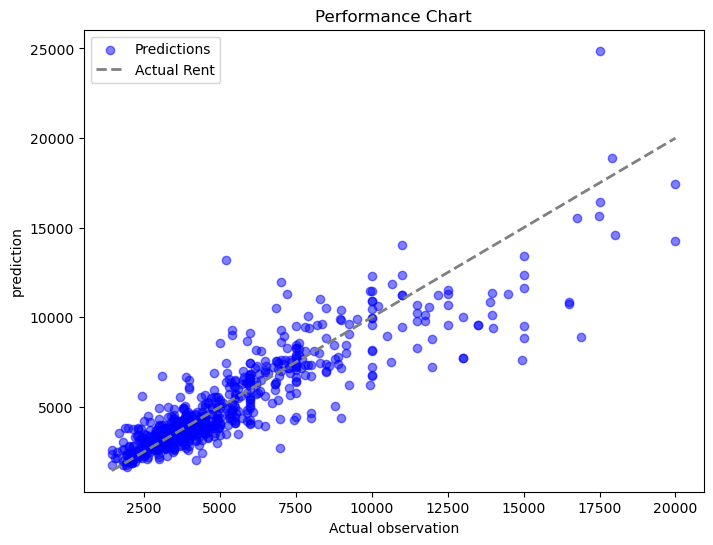

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6))
plt.title('Performance Chart')
plt.xlabel('Actual observation')
plt.ylabel('prediction')

plt.scatter(y_test, predictions, label='Predictions', alpha=0.5, color='blue')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', linewidth=2, label="Actual Rent",markersize=12)
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)

print("R-squared:", r2)

R-squared: 0.7901763442136409
